In [1]:
import numpy as np
from scipy.linalg import lstsq
import matplotlib.pyplot as plt
from utils import *

### Task 1.1

In [2]:
# load data
data_x0 = np.loadtxt('data/linear_function_data.txt')
x = data[:,0]
y = data[:,1]

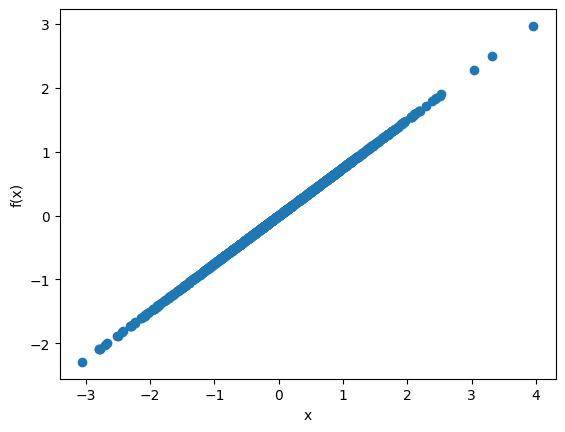

In [3]:
# plotting original data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [4]:
x = x.reshape(-1,1)
A = least_squares_minimization(x,y,None)

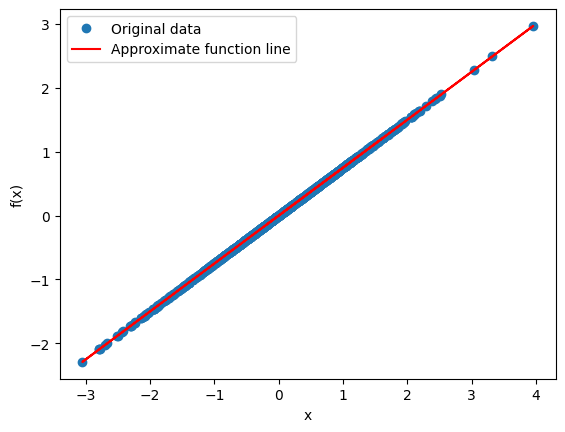

In [5]:
# plot the data and the fitted function
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, A*x, 'r', label='Approximate function line')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
plt.show()

### Task 1.2

In [7]:
# load data
data = np.loadtxt('data/nonlinear_function_data.txt')
x = data[:,0]
y = data[:,1]

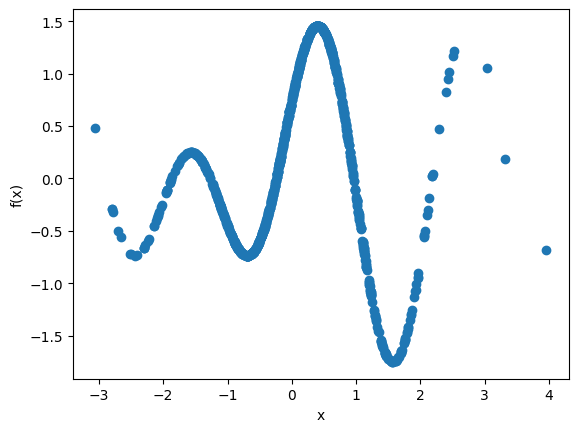

In [8]:
# plotting original data
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [9]:
x = x.reshape(-1,1)
A = least_squares_minimization(x,y,None)

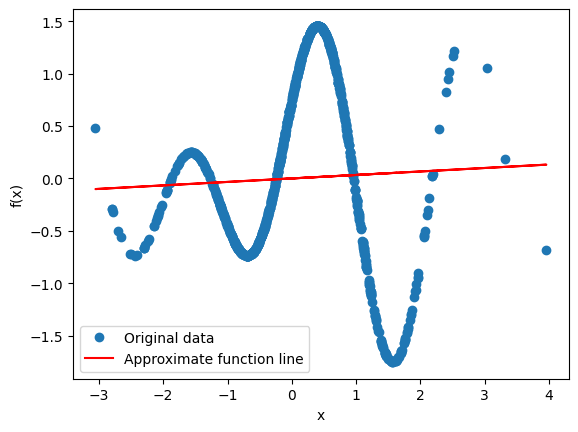

In [10]:
# plot the data and the fitted function
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, A*x, 'r', label='Approximate function line')
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()
plt.show()

### Task 1.3

In [11]:
# # radial basis function definition
# def radial_basis_function(data,l,eps):
#     phi = []
#     np.random.seed(42)
#     x_l = np.random.choice(len(data), l, replace=False)
#     for i in range(l):
#         normalized_values = data[x_l[i]] - data
#         phi_l = np.exp(-normalized_values**2/eps**2)
#         phi.append(phi_l)
#     return np.array(phi)

In [11]:
# load data
data = np.loadtxt('data/nonlinear_function_data.txt')
x = data[:,0]
y = data[:,1]

In [12]:
l = 10
eps = 2
phi = radial_basis_function(x, l, eps)

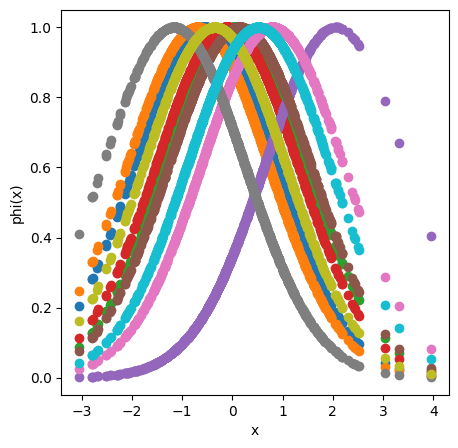

In [13]:
# plotting all the radial basis functions with different centers
fig = plt.figure(figsize = (5,5))
for i in range(l):
    plt.scatter(x, phi[i])
plt.xlabel('x')
plt.ylabel('phi(x)')
plt.show()

In [14]:
# approximating the functions using the least_squares_minimization
c = least_squares_minimization(phi.T, y, None)
f_hat = phi.T @ c

In [ ]:
# plot the data and the fitted function
fig = plt.figure(figsize=(10,10))
plt.plot(x, f_hat, '.r',label="Approximated function")
plt.plot(x, y, '.b',label="Original function")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")

Text(0, 0.5, 'f(x)')

<Figure size 640x480 with 0 Axes>

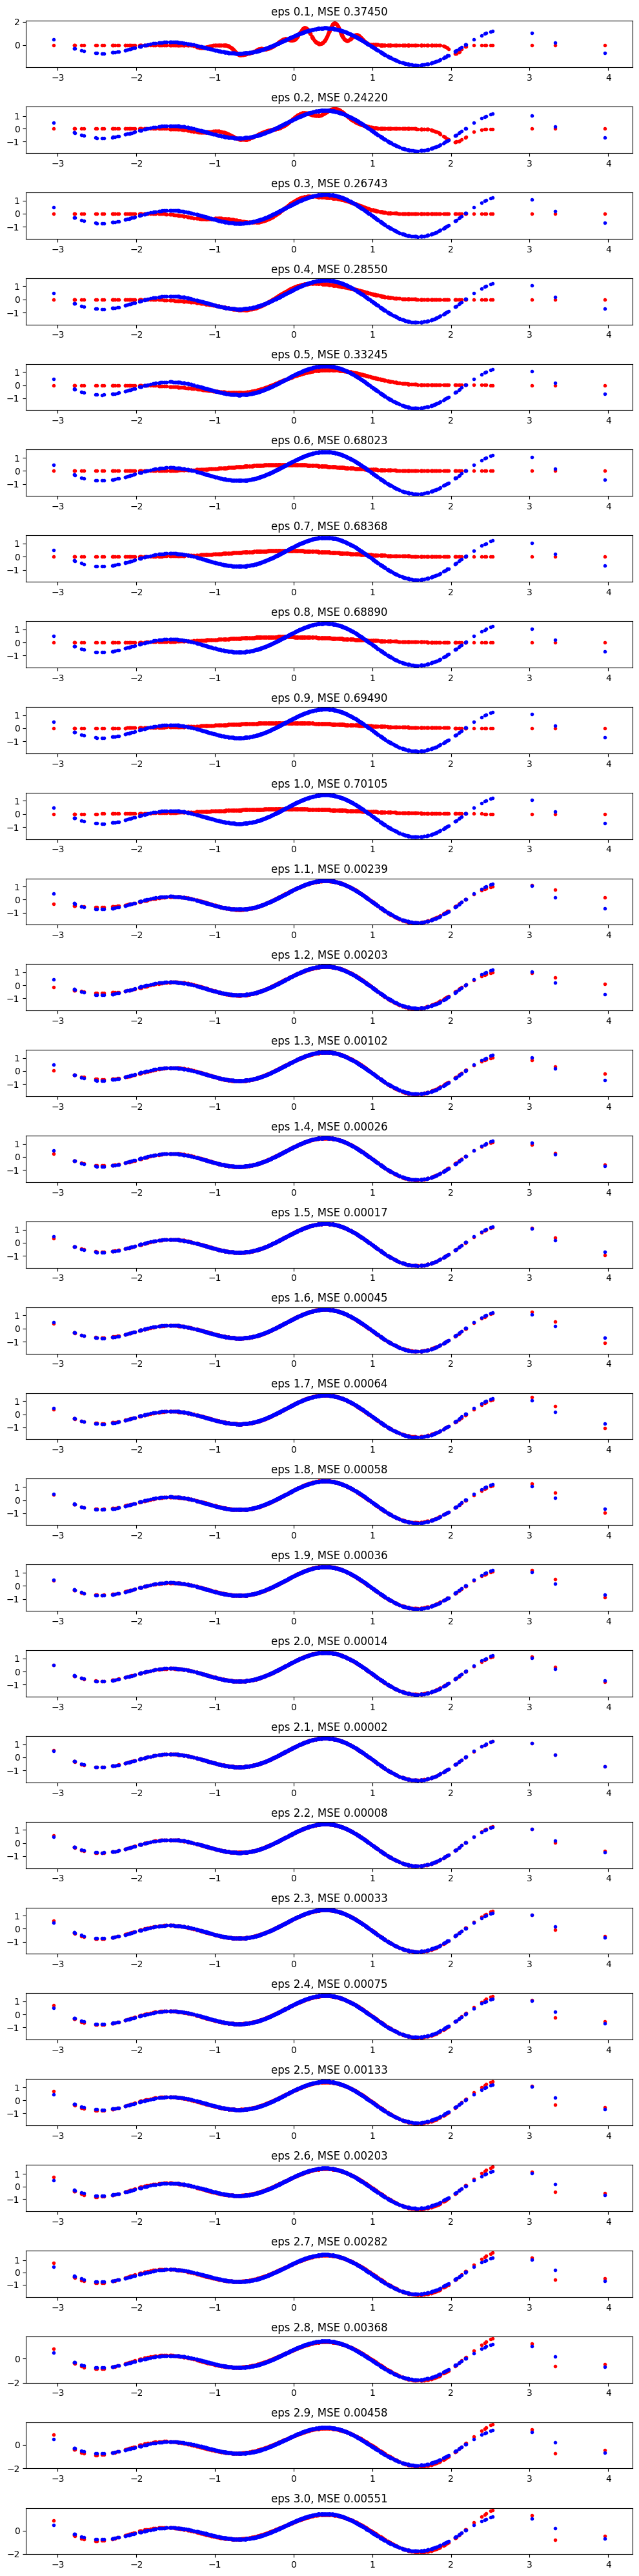

In [31]:
# Testing for different values of epsilon
fig = plt.figure()

fig,axes = plt.subplots(30,figsize=(10,40))
eps_arr = np.linspace(0.1,3,30)
l = 10
index = 0
for eps in eps_arr:
    phi = radial_basis_function(x,l,eps)
    c = least_squares_minimization(phi.T,y,eps)
    f_hat = phi.T @ c
    mse = np.mean((y - f_hat)**2)
    axes[index].plot(x, f_hat, '.r',label="fitted function")
    axes[index].plot(x, y, '.b',label="original function")
    axes[index].set_title('eps {:.1f}, MSE {:.5f}'.format(eps, mse))
    index = index + 1

plt.tight_layout()

#### Dataset A with the same method

Text(0.5, 1.0, 'eps 2.1, MSE 0.00000')

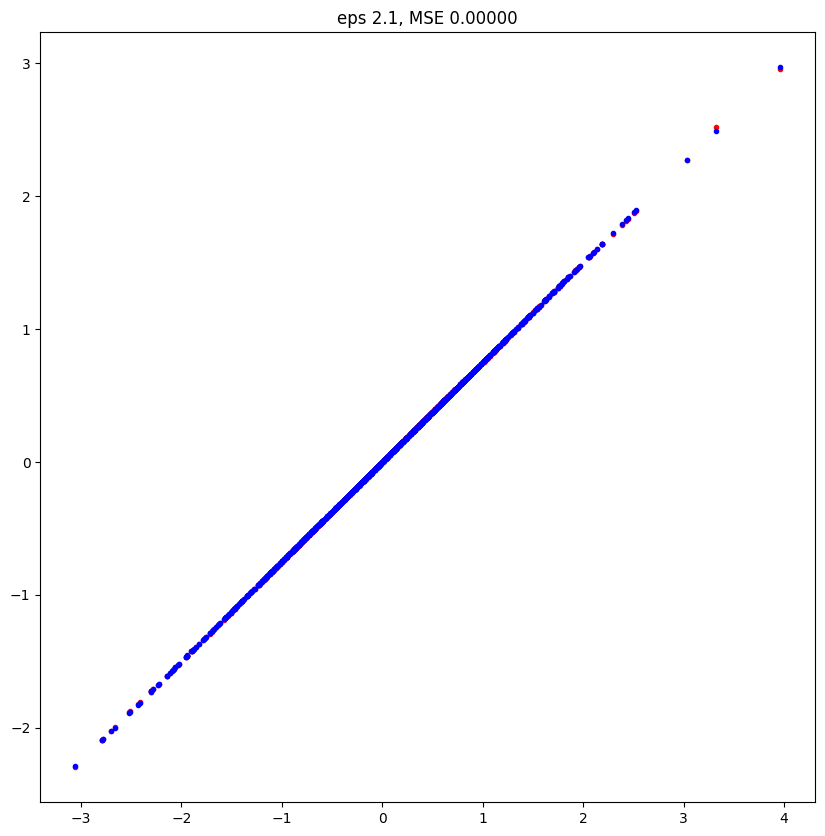

In [41]:
data = np.loadtxt('linear_function_data.txt')
x = data[:,0]
y = data[:,1]
l = 10
eps = 2.1
phi = radial_basis_function(x,l,eps)
c = least_squares_minimization(phi.T,y,eps)
f_hat = phi.T @ c
mse = np.mean((y - f_hat)**2)

fig = plt.figure(figsize=(10,10))
plt.plot(x, f_hat, '.r')
plt.plot(x, y, '.b')
plt.title('eps {:.1f}, MSE {:.5f}'.format(eps, mse))